<div style="background-color: #e0d7fa; color: #000064; font-size: 26px; padding: 15px; border-radius: 5px;">
Data preprocessing en aanmaken van 'the electric_hour' tabel
</div>

Remark: the timestamps in the resampled 15-min-data or 60min-data, they mark the beginning of a 15 minutes period.

In [5]:
# Dependencies:
!pip install -r ./code/requirements.txt -q

<div style="background-color: #e0e7fa; color: #000064; font-size: 20px; padding: 15px; border-radius: 5px;">
  Enkele imports ...
</div>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import pandas as pd
import sys
import os
from tqdm import tqdm
#add the folder to my sys.path to imoort a common helper file
current_dir = os.path.dirname(os.path.abspath('code/helpers.py'))
sys.path.append(current_dir)
from helpers import *
import datetime
from pathlib import Path

<div style="background-color: #e0e7fa; color: #000064; font-size: 20px; padding: 15px; border-radius: 5px;">
  De SEMS daily generation data-tabel ...
</div>

In [7]:
SEMS_daily = preprocess_SEMS_daily()
verify_daterange(SEMS_daily)


Deze kolommen zijn gedropt: ['Plant', 'Classification', 'Capacity(kW)', 'Income(EUR)']



,Generation(kWh)
Date,
2023-11-25,3.3
2024-04-10,13.7
2022-07-25,12.0
2024-11-09,1.0
2022-01-18,2.1


this file:" SEMS_dagtotalen.csv  already existed -> deleted existing file
File has been written to: data/preprocessed/SEMS/SEMS_dagtotalen.csv

Dataset bevat 1308 dagen, geen ontbrekend! 
Date range: 2021-09-01 -> 2025-03-31



'Verification complete'

<div style="background-color: #e0e7fa; color: #000064; font-size: 20px; padding: 15px; border-radius: 5px;">
  SEMS granular (op 1 à 5 minuten) tabel 
</div>

In [8]:
SEMS_granular, SEMS_15min, SEMS_60min = preprocess_SEMS_granular()


data/raw/SEMS/Historical Data Export-20241103161618.xls is verwijderd uit de lijst van in te lezen bestanden
data/raw/SEMS/Historical Data Export-20241103161625.xls is verwijderd uit de lijst van in te lezen bestanden
data/raw/SEMS/Historical Data Export-20241103161605.xls is verwijderd uit de lijst van in te lezen bestanden
data/raw/SEMS/Historical Data Export-20241103161612.xls is verwijderd uit de lijst van in te lezen bestanden



Extracting File contents: 100%|██████████| 191/191 [00:10<00:00, 17.44it/s]




There are 0 missing values
There are 0 duplicates

PF max: 655.35 PF min: -0.001

RSSI max: 0 RSSI min: 101

Maximal AC-voltage in the dataset: 255.1 Volts
Er zijn 49 'invaliden' gevonden - waarbij de cumsum daalde t.o.v. de vorige rij!
Er zijn 18 'invaliden' gevonden - waarbij de cumsum daalde t.o.v. de vorige rij!
Er zijn 14 'invaliden' gevonden - waarbij de cumsum daalde t.o.v. de vorige rij!
Er zijn 8 'invaliden' gevonden - waarbij de cumsum daalde t.o.v. de vorige rij!
Er zijn 5 'invaliden' gevonden - waarbij de cumsum daalde t.o.v. de vorige rij!
Er zijn 3 'invaliden' gevonden - waarbij de cumsum daalde t.o.v. de vorige rij!
Er zijn 1 'invaliden' gevonden - waarbij de cumsum daalde t.o.v. de vorige rij!
Er zijn 0 'invaliden' gevonden - waarbij de cumsum daalde t.o.v. de vorige rij!

-----This is the SEMS granular data resampled to 15min: 


,Power(W),AC_Voltage,Temperature(℃),Grid_frequency,15min_Generated(kWh)
Timestamp,,,,,
2021-09-01 06:15:00,0.000000,235.0,28.2,50.00,0.0
2021-09-01 06:30:00,0.000000,234.8,28.9,50.30,0.0
2021-09-01 06:45:00,51.333333,231.6,30.8,49.99,0.0
2021-09-01 07:00:00,87.666667,235.6,32.6,50.04,0.0
2021-09-01 07:15:00,106.666667,237.1,33.7,49.98,0.0
...,...,...,...,...,...
2025-03-31 19:15:00,83.600000,233.1,35.1,50.01,0.0
2025-03-31 19:30:00,73.533333,231.8,34.3,50.27,0.0
2025-03-31 19:45:00,65.733333,232.5,33.7,50.03,0.0


this file: data/preprocessed/SEMS/SEMS_table_granular.csv , already existed -> deleted existing file
-> Table has been written to: data/preprocessed/SEMS/SEMS_table_granular.csv
this file: data/preprocessed/SEMS/SEMS_table_15min.csv , already existed -> deleted existing file
-> Table has been written to: data/preprocessed/SEMS/SEMS_table_15min.csv
this file: data/preprocessed/SEMS/SEMS_table_60min.csv , already existed -> deleted existing file
-> Table has been written to: data/preprocessed/SEMS/SEMS_table_60min.csv



In [9]:
# Hoe 'ziet' deze granulaire tabel eruit? 
display(SEMS_granular, SEMS_60min)

,Status,AC_Voltage,Grid_frequency,Power(W),Temperature(℃),Total_Generated(kWh),Wifi_power
Timestamp,,,,,,,
2021-09-01 06:18:49,Wait,233.8,50.00,0,27.6,2257.8,0
2021-09-01 06:20:49,Wait,235.0,50.00,0,27.8,2257.8,0
2021-09-01 06:25:49,Wait,235.0,49.99,0,28.2,2257.8,0
2021-09-01 06:30:50,Wait,234.8,49.99,0,28.5,2257.8,0
2021-09-01 06:35:50,Wait,233.4,49.99,0,28.7,2257.8,0
...,...,...,...,...,...,...,...
2025-03-31 20:13:28,Normal,233.3,49.99,56,32.7,11240.4,100
2025-03-31 20:14:28,Normal,232.1,49.97,62,32.6,11240.4,100
2025-03-31 20:15:29,Normal,232.7,49.98,62,32.6,11240.4,100


,Power(W),AC_Voltage,Temperature(℃),Grid_frequency,1h_Generated(kWh)
Timestamp,,,,,
2021-09-01 06:00:00,17.111111,235.0,30.8,50.30,0.0
2021-09-01 07:00:00,115.750000,237.1,35.0,50.04,0.1
2021-09-01 08:00:00,173.916667,238.6,36.4,50.03,0.1
2021-09-01 09:00:00,323.833333,235.1,37.7,50.02,0.3
2021-09-01 10:00:00,547.333333,240.9,40.5,50.06,0.5
...,...,...,...,...,...
2025-03-31 16:00:00,1135.400000,247.6,49.0,50.12,1.1
2025-03-31 17:00:00,686.900000,240.1,45.8,50.09,0.7
2025-03-31 18:00:00,246.033333,237.0,41.6,50.07,0.2


<div style="background-color: #e0e7fa; color: #000064; font-size: 20px; padding: 15px; border-radius: 5px;">
  De Fluvius dagelijkse productie tabel
</div>

In [10]:
fluvius_data = preprocess_fluvius_daily()
verify_daterange(fluvius_data)


Deze kolommen zijn gedropt: ['Omschrijving', 'Eenheid', 'EAN-code', 'Meter', 'Metertype', 'Van (tijdstip)', 'Tot (datum)', 'Tot (tijdstip)']

0 duplicate rijen gedetecteerd.

Ik heb maar een enkel tarief voor 'gebruik' and 'injectie' dus someren we Dag & Nacht kolommen

Pivot table complete - output: 



Register,Afname Dag,Afname Nacht,Injectie Dag,Injectie Nacht
Dag,,,,
2021-09-01,1.731,1.219,2.483,0.000
2021-09-02,1.081,0.908,9.342,0.000
2021-09-03,0.254,0.801,12.871,0.000
2021-09-04,0.000,2.757,0.000,4.855
2021-09-05,0.000,3.664,0.000,9.022
...,...,...,...,...
2025-03-27,2.492,1.539,11.429,0.000
2025-03-28,2.122,1.667,3.808,0.000
2025-03-29,0.000,2.688,0.000,8.138



Pre-join check: zijn de Dataframes van gelijke lengte? dus hetzelfde aantal dagen? -->True

Dataset bevat 1308 dagen, geen ontbrekend! 
Date range: 2021-09-01 -> 2025-03-31

this file:" Fluvius_dagtotalen.csv  already existed -> deleted existing file
File has been written to: data/preprocessed/Fluvius/Fluvius_dagtotalen.csv

Dataset bevat 1308 dagen, geen ontbrekend! 
Date range: 2021-09-01 -> 2025-03-31



'Verification complete'

<div style="background-color: #e0e7fa; color: #000064; font-size: 20px; padding: 15px; border-radius: 5px;">
  De Fluvius kwartierwaarden tabel (+ resampling op 1 uur)
</div>

In [11]:
fluvius_15m, fluvius_60m = preprocess_fluvius_kwartier()

14 duplicate rijen gedetecteerd.

Ik heb maar een enkel tarief voor 'gebruik', dus someren we Dag & Nacht kolommen


Deze kolommen zijn gedropt: ['Omschrijving', 'Eenheid', 'EAN-code', 'Meter', 'Metertype', 'Van (tijdstip)', 'Tot (datum)', 'Tot (tijdstip)', 'Van (datum)']

Pivot table complete - output: 



Volume (kWh)                                         
Register              Afname Dag Afname Nacht Injectie Dag Injectie Nacht
Timestamp                                                                
2021-09-01 00:00:00          NaN        0.015          NaN            0.0
2021-09-01 00:15:00          NaN        0.027          NaN            0.0
2021-09-01 00:30:00          NaN        0.022          NaN            0.0
2021-09-01 00:45:00          NaN        0.014          NaN            0.0
2021-09-01 01:00:00          NaN        0.031          NaN            0.0
...                          ...          ...          ...            ...
2025-03-31 22:45:00          NaN        0.061          NaN            0.0
2025-03-31 23:00:00          NaN        0.051          NaN            0.0
2025-03-31 23:15:00          NaN        0.031          NaN            0.0
2025-03-31 23:30:00          NaN        0.023          NaN            0.0
2025-03-31 23:45:00          NaN        0.036          NaN            0.0

[125552 rows x 4 columns]


Pre-join check: zijn de Dataframes van gelijke lengte? dus hetzelfde aantal dagen? --> True

Er zijn 179 met een 'Mixed' Validatiestatus, dit kan wijzen op geschatte waarden (interpolatie vanuit Fluvius)
 of ontbrekende waarden (de meter stond uit). 

Dataset bevat 1308 dagen, geen ontbrekend! 
Date range: 2021-09-01 -> 2025-03-31

this file:" Fluvius_15min.csv  already existed -> deleted existing file
File has been written to: data/preprocessed/Fluvius/Fluvius_15min.csv



In [12]:
# Hoe 'ziet' deze tabel eruit? 
fluvius_60m

,Validatiestatus,Afname (Kwh),Injectie (Kwh)
Timestamp,,,
2021-09-01 00:00:00,Uitgelezen,0.078,0.0
2021-09-01 01:00:00,Uitgelezen,0.094,0.0
2021-09-01 02:00:00,Uitgelezen,0.089,0.0
2021-09-01 03:00:00,Uitgelezen,0.077,0.0
2021-09-01 04:00:00,Uitgelezen,0.095,0.0
...,...,...,...
2025-03-31 19:00:00,Uitgelezen,0.356,0.0
2025-03-31 20:00:00,Uitgelezen,0.137,0.0
2025-03-31 21:00:00,Uitgelezen,0.134,0.0


<div style="background-color: #e0e7fa; color: #000064; font-size: 20px; padding: 15px; border-radius: 5px;">
  Een kleine visual check op uur-niveau ...
</div>

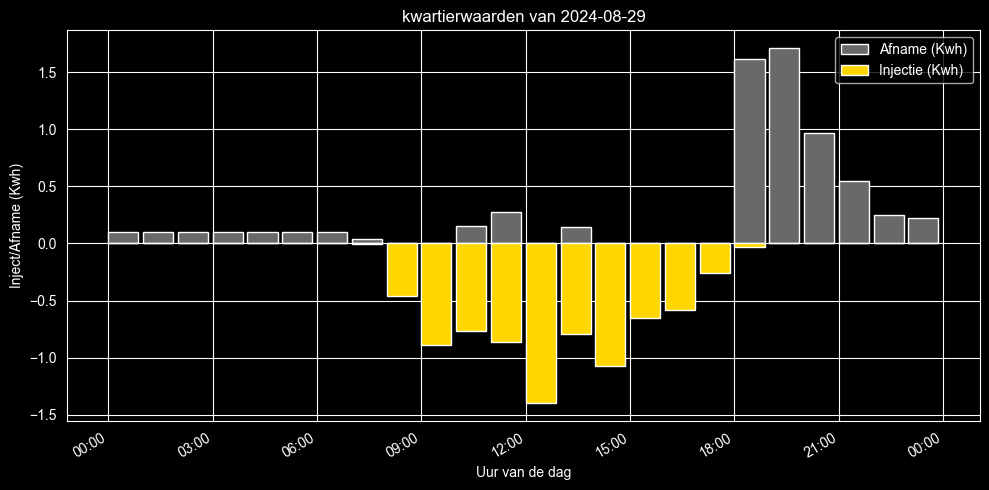

In [13]:
# Hoe 'ziet' deze data eruit? 

fluvius_60 = fluvius_60m.copy()
fluvius_60['timestamp'] = fluvius_60.index
date_filter = datetime.date(2024, 8, 29)
filter_ = fluvius_60['timestamp'].dt.date == date_filter
filtered_data = fluvius_60[filter_]

fig, ax = plt.subplots(figsize=(10, 5))

# Convert timestamps to matplotlib datetime format
x = (filtered_data['timestamp'])

ax.bar(x, filtered_data['Afname (Kwh)'], color='dimgrey', width=0.036, label='Afname (Kwh)', align='edge')    # width 30 min: 1 van de 48 halfuren 1/48 ≈ 0.0208
ax.bar(x, filtered_data['Injectie (Kwh)'], color='gold', width=0.036, label='Injectie (Kwh)', align='edge')

ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
fig.autofmt_xdate()

ax.set_xlabel('Uur van de dag')
ax.set_ylabel('Inject/Afname (Kwh)')
ax.set_title(f'kwartierwaarden van {date_filter}')
ax.legend()
plt.tight_layout()
plt.show()


In [14]:
# Hoe 'ziet' de SEMS hourly tabel eruit? 
# display(SEMS_60min.sort_values(by='1h_Generated(kWh)', ascending=False))
SEMS_60min

,Power(W),AC_Voltage,Temperature(℃),Grid_frequency,1h_Generated(kWh)
Timestamp,,,,,
2021-09-01 06:00:00,17.111111,235.0,30.8,50.30,0.0
2021-09-01 07:00:00,115.750000,237.1,35.0,50.04,0.1
2021-09-01 08:00:00,173.916667,238.6,36.4,50.03,0.1
2021-09-01 09:00:00,323.833333,235.1,37.7,50.02,0.3
2021-09-01 10:00:00,547.333333,240.9,40.5,50.06,0.5
...,...,...,...,...,...
2025-03-31 16:00:00,1135.400000,247.6,49.0,50.12,1.1
2025-03-31 17:00:00,686.900000,240.1,45.8,50.09,0.7
2025-03-31 18:00:00,246.033333,237.0,41.6,50.07,0.2


<div style="background-color: #e0e7fa; color: #000064; font-size: 20px; padding: 15px; border-radius: 5px;">
  Introducing the electric hour
</div>

Dit is de tabel die de gegevens van Fluvius en SEMS samenbrengt op gelijk kwartier

In [15]:
# Left join (elk uur is normaal present in beide tabellen):

df_electric_hour = pd.merge(left = fluvius_60m, right=SEMS_60min, how = 'left', on='Timestamp').sort_index()

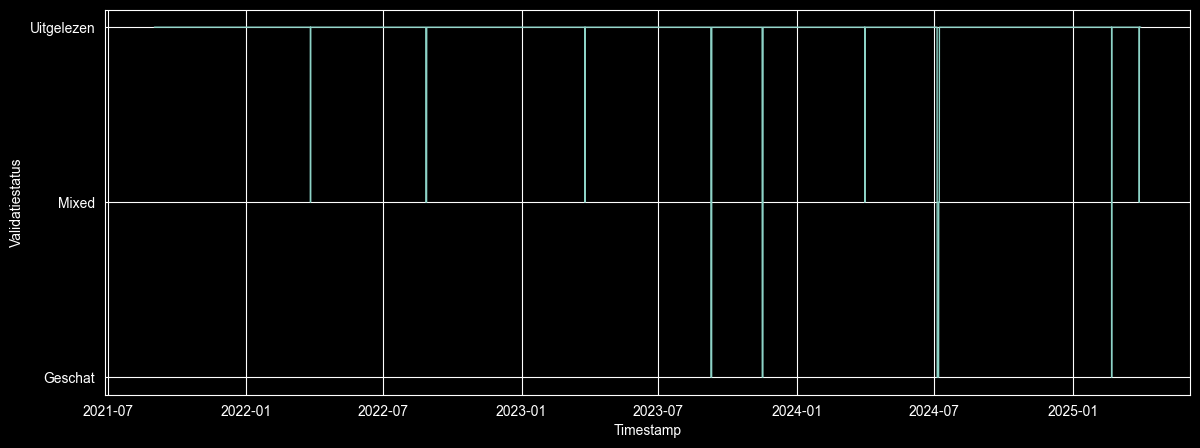

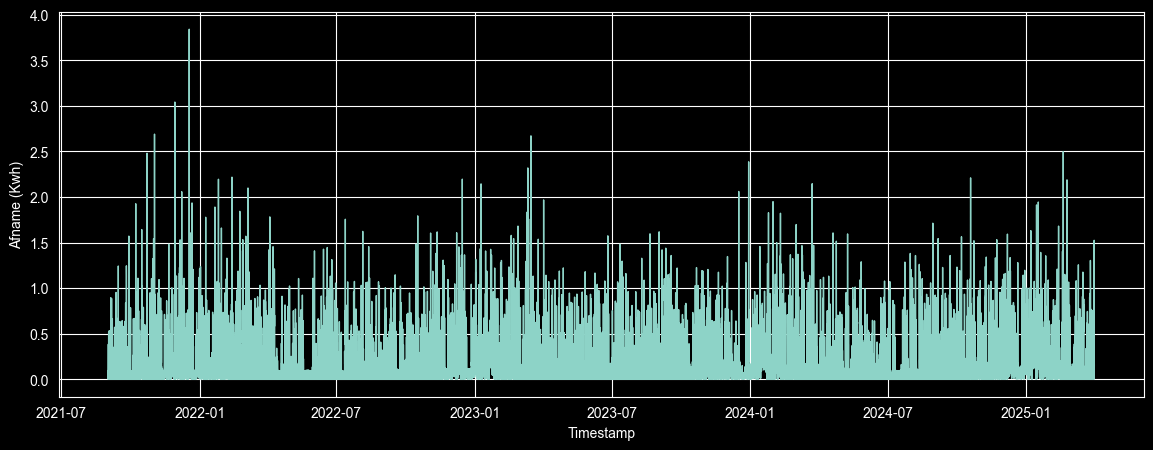

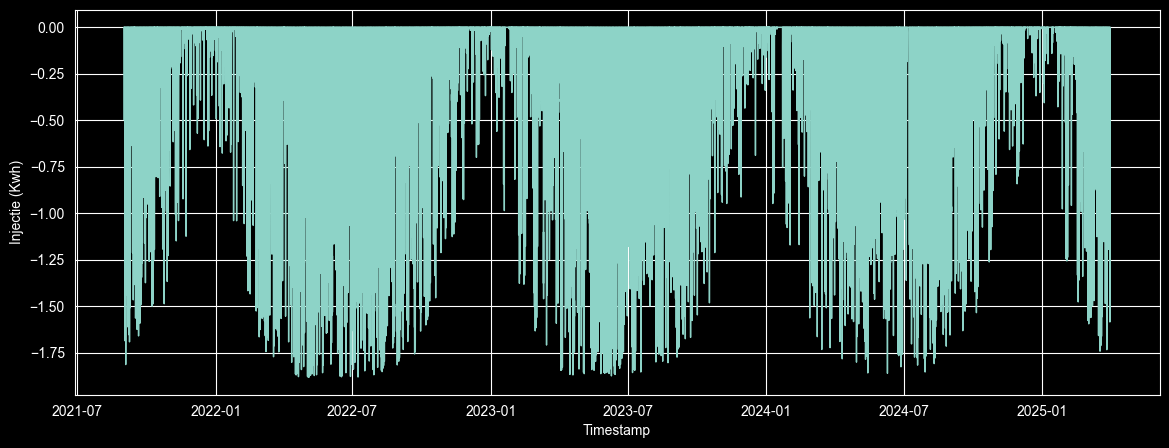

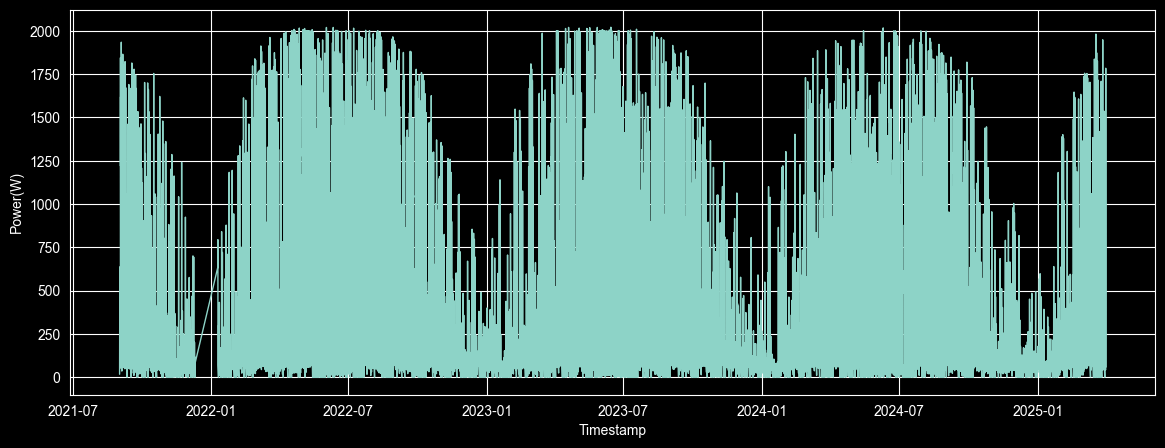

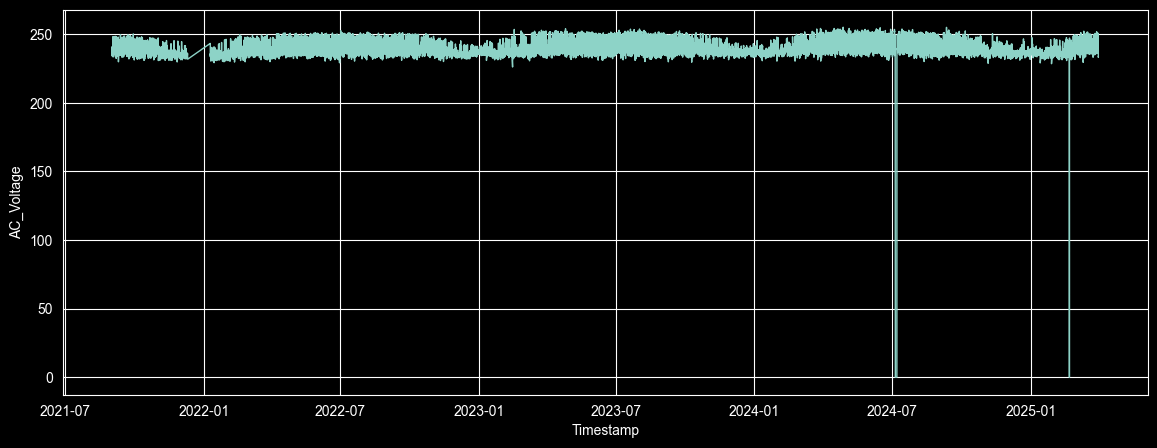

/Users/jonas/PycharmProjects/Data_Scientist_Syntra/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8451 (\N{DEGREE CELSIUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


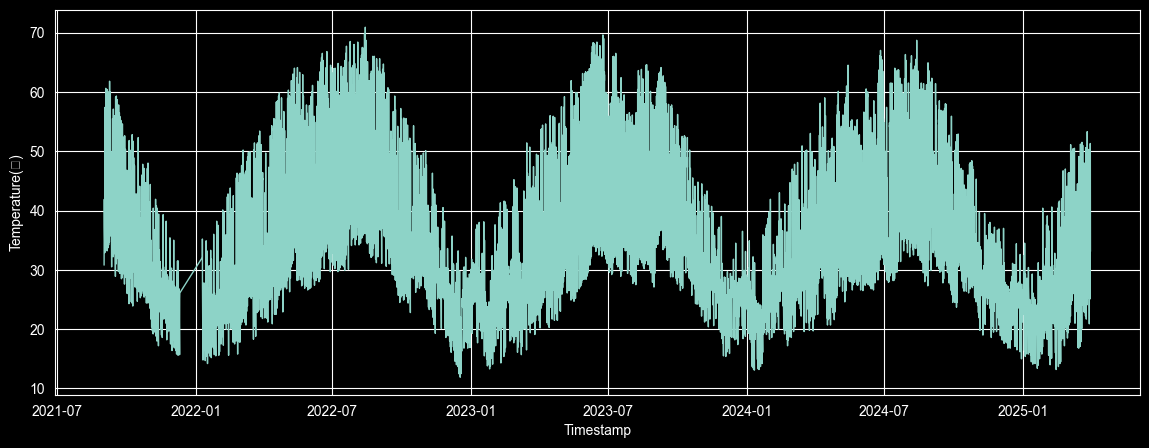

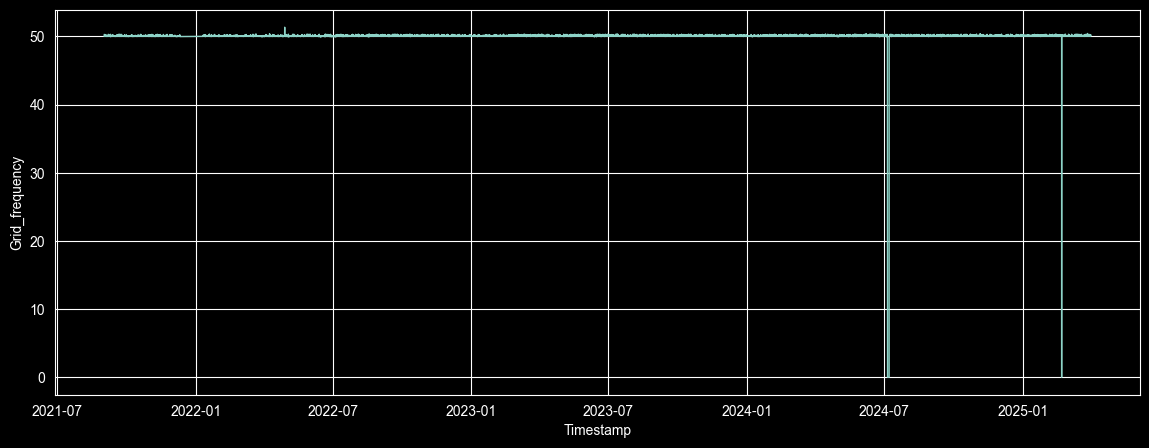

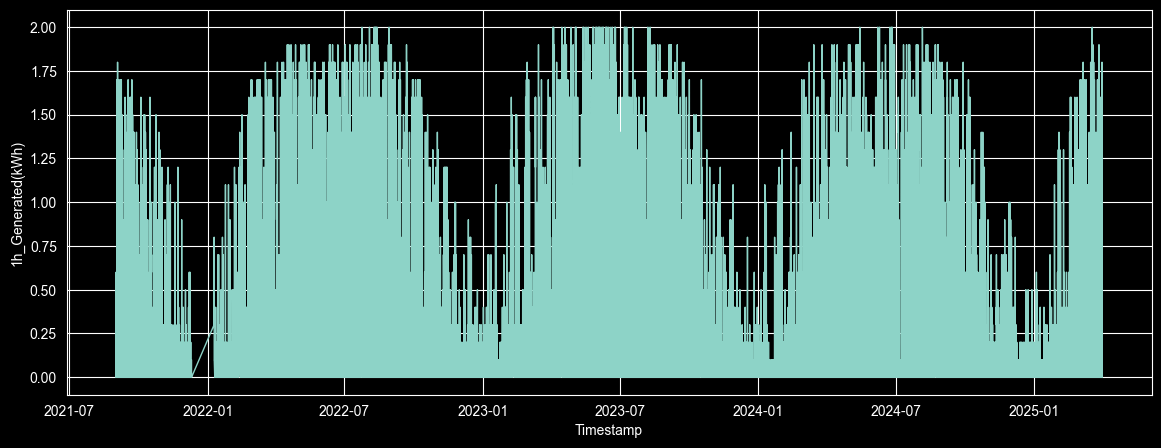

In [16]:
# Een beetje data-exploratie en visualisatie:

for col in df_electric_hour.columns:
    fig, ax = plt.subplots(figsize=(14,5))
    sns.lineplot(df_electric_hour[col], ax=ax, linewidth = 1)
    plt.show()

In [17]:
df_electric_hour.sort_values(by='Injectie (Kwh)')

,Validatiestatus,Afname (Kwh),Injectie (Kwh),Power(W),AC_Voltage,Temperature(℃),Grid_frequency,1h_Generated(kWh)
Timestamp,,,,,,,,
2022-05-03 13:00:00,Uitgelezen,0.000,-1.882,1284.500000,248.9,60.3,50.02,1.2
2022-05-04 12:00:00,Uitgelezen,0.000,-1.882,2013.833333,249.6,58.6,50.02,1.8
2022-07-08 11:00:00,Uitgelezen,0.000,-1.881,1998.764706,248.0,64.8,50.08,1.9
2022-07-08 13:00:00,Uitgelezen,0.000,-1.881,1770.677966,248.9,63.2,50.05,1.8
2022-06-16 13:00:00,Uitgelezen,0.000,-1.880,1989.333333,245.8,65.8,50.02,1.8
...,...,...,...,...,...,...,...,...
2023-02-05 20:00:00,Uitgelezen,0.211,0.000,NaN,NaN,NaN,NaN,NaN
2023-02-05 19:00:00,Uitgelezen,0.483,0.000,NaN,NaN,NaN,NaN,NaN
2023-02-05 18:00:00,Uitgelezen,1.116,0.000,NaN,NaN,NaN,NaN,NaN


<div style="background-color: #e0e7fa; color: #000064; font-size: 14px; padding: 15px; border-radius: 5px;">
  Het maximale vermogen van omvormer is 2 kW, dus op 1 uur max 2 kWh, alles erboven is een 'foutje'. (dit is reeds rechtgezet in de cleaning-helper functie). Ik verwachtte dat er een overwicht aan nullen bij de productie zijn ('snacht en 'smorgens). [deze zijn hoogstwaarschijnlijk NaNs ipv 0 en zie je niet op de grafiek]
</div>



Text(0.5, 0, 'Totaal gegenereerde kWh per uur')

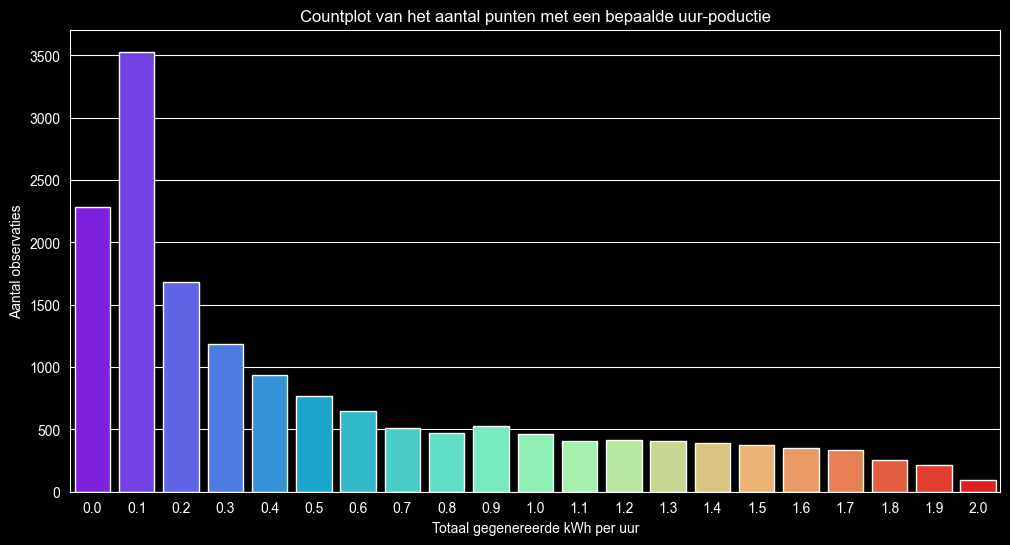

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
xx = df_electric_hour['1h_Generated(kWh)'].round(1)
sns.countplot(df_electric_hour, x=xx,ax=ax, hue = xx, palette='rainbow', legend=False)
ax.set_title('Countplot van het aantal punten met een bepaalde uur-poductie')
ax.set_ylabel('Aantal observaties')
ax.set_xlabel('Totaal gegenereerde kWh per uur')

<div style="background-color: #e0e7fa; color: #000064; font-size: 20px; padding: 15px; border-radius: 5px;">
  Een beetje "Data enrichment" met het oog op Machine Learning in de nabije toekomst.
</div>



In [19]:
df_electric_hour['daglicht(s)'] = [get_daylight_duration(x) for x in df_electric_hour.index]
df_electric_hour['solstice_distance(days)'] = [min_days_to_solstice(x) for x in df_electric_hour.index]

ModuleNotFoundError: No module named 'astral'

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df_electric_hour.plot(kind='scatter', x='solstice_distance(days)', y='daglicht(s)', s=0.5, color='mediumblue', ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
df_electric_hour.plot(y='daglicht(s)', color='mediumblue', ax=ax, kind='line', legend=False)
ax.set_ylabel('Daglicht in seconden', labelpad =15)
plt.legend(bbox_to_anchor=[1.1125, 0.905],loc='center')
ax2=ax.twinx()
df_electric_hour.plot(y='solstice_distance(days)', color='magenta', ax=ax2, kind='line', legend=False)
ax2.set_ylabel('Afstand tot langste dag in dagen', rotation=-90, labelpad =15)
plt.legend(bbox_to_anchor=[1.16, 0.85], loc='center')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
df_electric_hour.plot(y='daglicht(s)', color='mediumblue', ax=ax, kind='line', legend=False)
ax.set_ylabel('Daglicht in seconden', labelpad =15)
plt.legend(bbox_to_anchor=[1.1125, 0.905],loc='center')
ax2=ax.twinx()
ax2.yaxis.set_inverted(True)
df_electric_hour.plot(y='solstice_distance(days)', color='magenta', ax=ax2, kind='line', legend=False)
ax2.set_ylabel('Afstand tot langste dag in dagen', rotation=-90, labelpad =15)
plt.legend(bbox_to_anchor=[1.16, 0.85], loc='center')
plt.show()


# fig, ax = plt.subplots(figsize=(12,6))
# df_electric_hour.plot(y='daglicht(s)', color='mediumblue', ax=ax, kind='line', legend=False)
# plt.legend(bbox_to_anchor=[1.1125, 0.9],loc='center')
# ax2=ax.twinx()
# ax2.yaxis.set_inverted(True)
# df_electric_hour.plot(y='solstice_distance(days)', color='midnightblue', ax=ax2, kind='line', legend=False)
# plt.legend(bbox_to_anchor=[1.16, 0.8], loc='center')

In [ ]:
SEMS_daily['daglicht(s)'] = [get_daylight_duration(x) for x in SEMS_daily.index]
SEMS_daily['solstice_distance(days)'] = [min_days_to_solstice(x) for x in SEMS_daily.index]

fig, axes = plt.subplots(ncols = 2, figsize=(12,6))
SEMS_daily.plot(kind='scatter', x='solstice_distance(days)', y='Generation(kWh)',ax=axes[0], c='purple', s=9)
axes[1].xaxis.set_inverted(True)
SEMS_daily.plot(kind='scatter', x='daglicht(s)', y='Generation(kWh)',ax= axes[1], s=9, c='mediumblue')

fig, ax = plt.subplots(figsize=(12,6))
SEMS_daily.plot(kind='scatter', x='solstice_distance(days)', y='Generation(kWh)',ax=ax, c='purple', s=9)
ax2=ax.twiny()
ax2.xaxis.set_inverted(True)
SEMS_daily.plot(kind='scatter', x='daglicht(s)', y='Generation(kWh)',ax= ax2, s=9, c='mediumblue')
plt.show()

<div style="background-color: #e0e7fa; color: #000064; font-size: 20px; padding: 15px; border-radius: 5px;">
  Deze periode ontbreekt: 11.12.2021 --> 08.01.2022
    
  Poging om met de KNN imputer van scipy de voorspellingen te doen is gelukt, maar ik was niet onder de indruk.
</div>
(code niet meegeleverd) 
<div style="background-color: #e0e7fa; color: #000064; font-size: 20px; padding: 15px; border-radius: 5px;">
  Alternatief: dezelfde periode kopieren van een jaar later (2022-12-11--> 2023-01-08) en schalen naar de totale opwekking in de missing periode (wel bekend). 
</div>



In [ ]:
dates_unique = set([x for x in SEMS_granular.index.date])
dates_complete_range = set([x for x in SEMS_60min.index.date])    # de resampling vult de Timeindex aan om alle uren te representeren tussen min en max datum (als je aggregeert tenmiste - and I do...)

print(f'We missen {(max(dates_unique)-min(dates_unique)+datetime.timedelta(days=1)).days-len(dates_unique)} dagen in totaal')    # (max(vandaag&morgen)-min(vandaag&morgen)).days-len(vandaag&morgen) = 1dag - 2dagen = -1 

missing_days = dates_complete_range - dates_unique
print(f'We missen er in deze range {min(missing_days)}--> {max(missing_days)}, toevallig een periode van {len(missing_days)} dagen, dus zijn ze allemaal.')

In [ ]:
# Laten we kijken naar deze periode in 2023 en 2024
missing_dates = pd.date_range(start='2021-12-11', end='2022-01-09', inclusive='both', freq='15min')
missing_filter = df_electric_hour.index.isin(missing_dates)

In [ ]:
replacements = pd.date_range(start='2022-12-11', end='2023-01-09', inclusive='both', freq='15min')
date_filter = df_electric_hour.index.isin(replacements)
news = df_electric_hour.loc[date_filter,'1h_Generated(kWh)']

In [ ]:
# wat is de laatste Total_Generated(kWh) op 2021-12-10 en wat is de eerste van 2022-01-08; dit stukje productie missen we
before = pd.date_range(start='2021-12-10', end='2021-12-11', freq='1s')
after = pd.date_range(start='2022-01-09', end='2022-01-10', freq='1s')
missing_prod = SEMS_granular[SEMS_granular.index.isin(after)]['Total_Generated(kWh)'].min() - SEMS_granular[SEMS_granular.index.isin(before)]['Total_Generated(kWh)'].max()

In [ ]:
scaler = missing_prod/news.sum()
print(f'De vervangende waarden hebben eens productiesom van {news.sum():.2f}, de reële productie was {missing_prod:.2f}, we scalen elke waard met met {scaler:3f}')
news= news*scaler

In [ ]:
df_electric_hour.loc[missing_filter,'1h_Generated(kWh)'] = news.values # toewijzen van geschaalde waarden

### In deze periode is er weinig productie van de PV installatie dus de 'fout' die we maken is klein. 
### De data ontbreken omdat ik niet was thuis in deze periode en de wifi-router had uitgeschakeld. De omvormer blijkt slecht een zeer kleine buffer aan data intern op te slaan. 

In [ ]:
df_electric_hour.head()

In [ ]:
# wegschrijven van the electric hour
export_dagtotalen(df_electric_hour, Path('data/'), 'electric_hour.csv')